In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


ModuleNotFoundError: No module named 'seaborn'

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Map numeric species to actual names
df['species'] = df['species'].map(dict(zip(range(3), iris.target_names)))
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


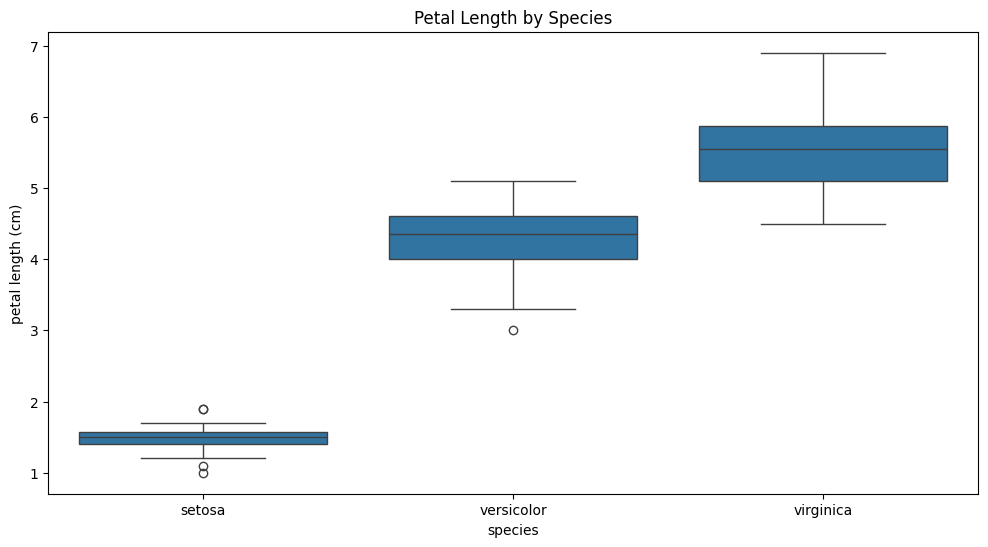

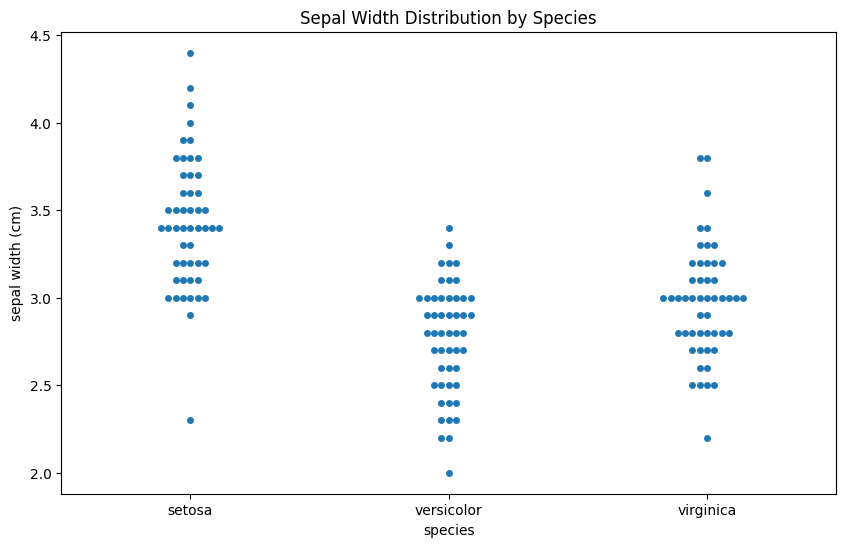

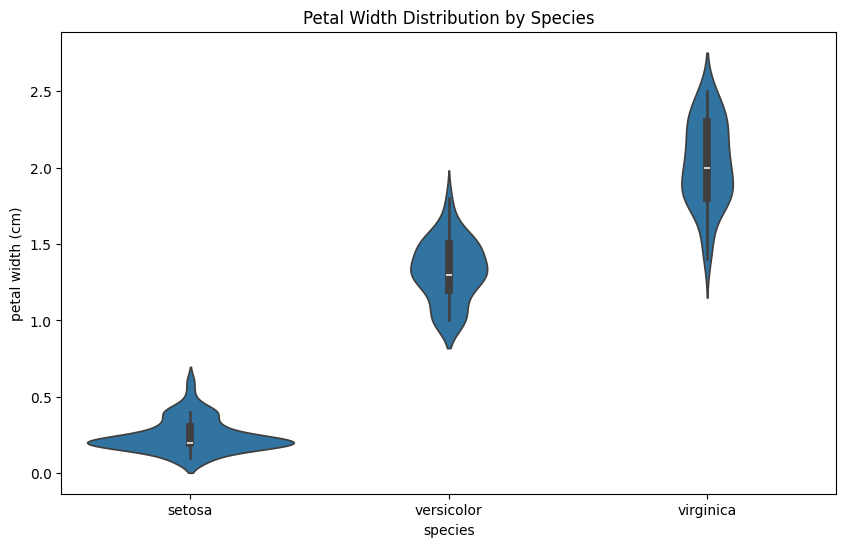

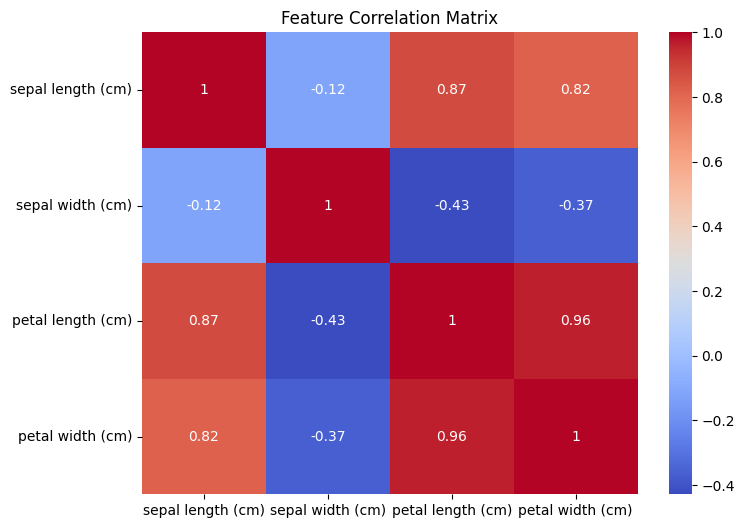

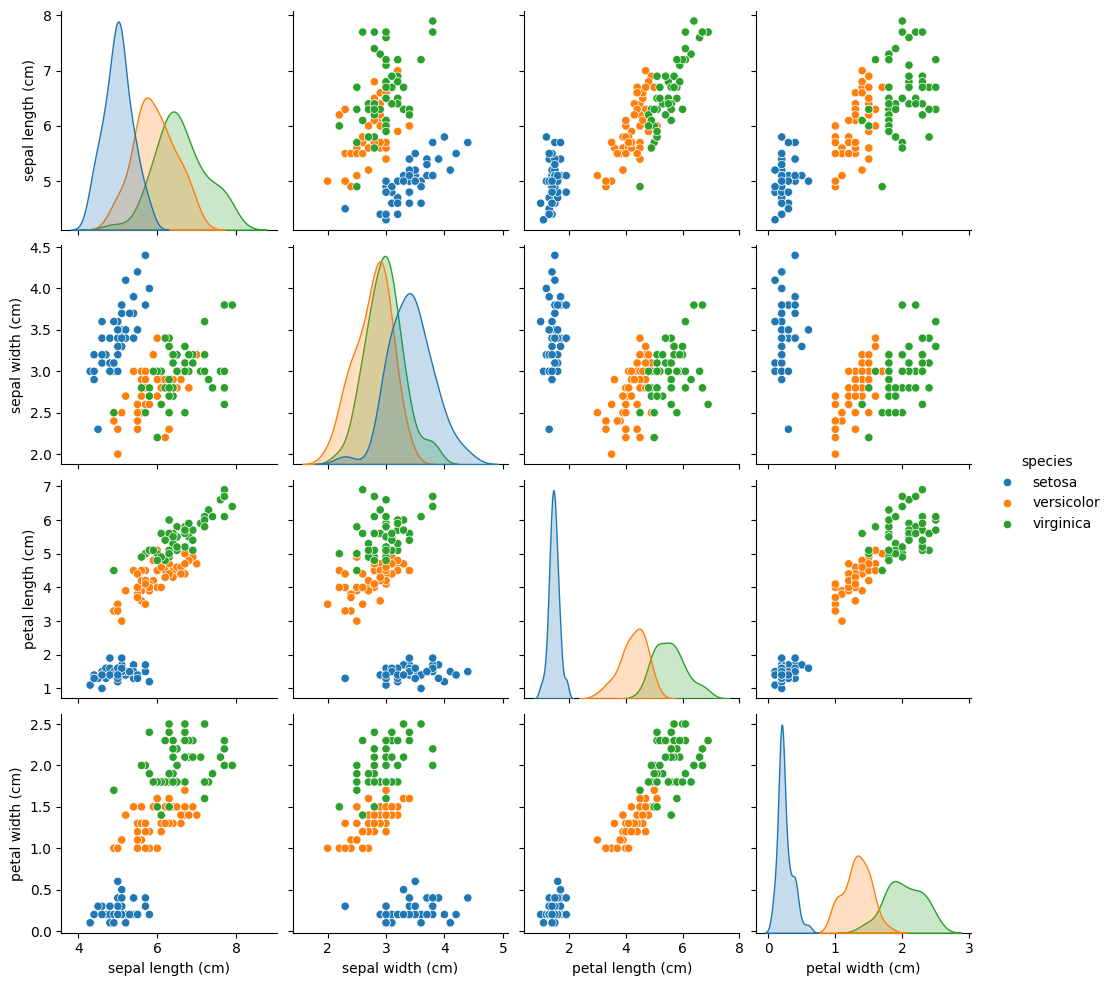

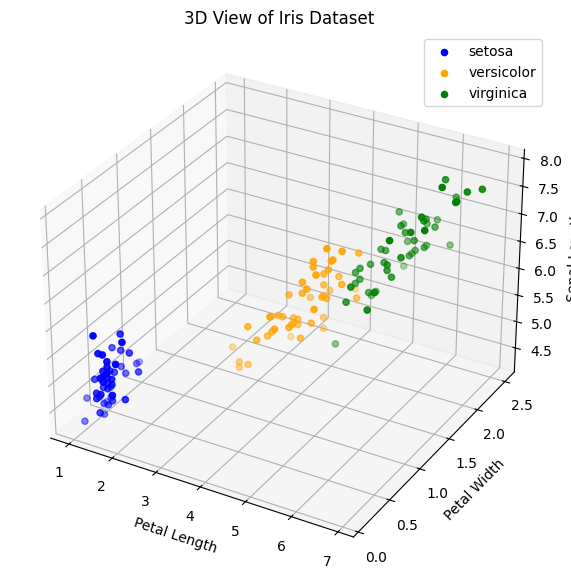

In [5]:
# Data Visualization

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='species', y='petal length (cm)')
plt.title('Petal Length by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.swarmplot(x='species', y='sepal width (cm)', data=df)
plt.title('Sepal Width Distribution by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='petal width (cm)', data=df)
plt.title('Petal Width Distribution by Species')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm')  # exclude species
plt.title("Feature Correlation Matrix")
plt.show()

sns.pairplot(df, hue='species')
plt.show()

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = {'setosa': 'blue', 'versicolor': 'orange', 'virginica': 'green'}
for species in df['species'].unique():
    subset = df[df['species'] == species]
    ax.scatter(subset['petal length (cm)'], subset['petal width (cm)'], subset['sepal length (cm)'],
               label=species, color=colors[species])

ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Sepal Length')
plt.title('3D View of Iris Dataset')
plt.legend()
plt.show()



In [6]:
#Splitting the dataset into training and testing sets
# 80% training and 20% testing
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
#Support Vector Machine Classifier
from sklearn.svm import SVC
model_svc = SVC(probability=True)
model_svc
model_svc.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

prediction1 = model_svc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, prediction1) * 100)

# Fix indexing error
y_test_array = y_test.to_numpy()

for i in range(len(prediction1)):
    print(f"Actual: {y_test_array[i]} | Predicted: {prediction1[i]}")


Accuracy: 100.0
Actual: versicolor | Predicted: versicolor
Actual: setosa | Predicted: setosa
Actual: virginica | Predicted: virginica
Actual: versicolor | Predicted: versicolor
Actual: versicolor | Predicted: versicolor
Actual: setosa | Predicted: setosa
Actual: versicolor | Predicted: versicolor
Actual: virginica | Predicted: virginica
Actual: versicolor | Predicted: versicolor
Actual: versicolor | Predicted: versicolor
Actual: virginica | Predicted: virginica
Actual: setosa | Predicted: setosa
Actual: setosa | Predicted: setosa
Actual: setosa | Predicted: setosa
Actual: setosa | Predicted: setosa
Actual: versicolor | Predicted: versicolor
Actual: virginica | Predicted: virginica
Actual: versicolor | Predicted: versicolor
Actual: versicolor | Predicted: versicolor
Actual: virginica | Predicted: virginica
Actual: setosa | Predicted: setosa
Actual: virginica | Predicted: virginica
Actual: setosa | Predicted: setosa
Actual: virginica | Predicted: virginica
Actual: virginica | Predicted:

In [8]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
prediction2 = model_lr.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, prediction2) * 100)

Accuracy: 100.0


In [9]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
prediction3 = model_dt.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, prediction3) * 100)

Accuracy: 100.0


In [10]:
#Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



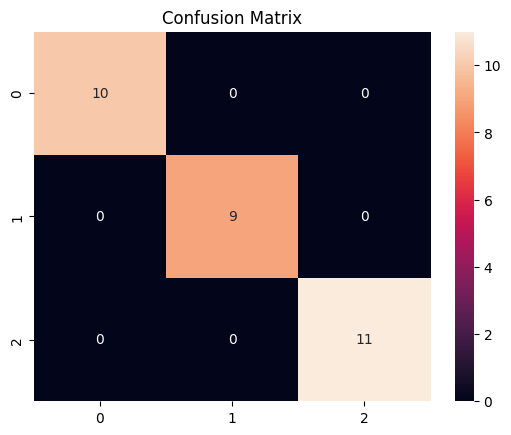

In [11]:
#Detailed Classification Report
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


In [12]:
# Testing the model with a new sample

import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.metrics import pairwise_distances_argmin_min


# Define new sample
new_sample_df = pd.DataFrame(
    [[4.1, 2.23, 3.13, 1.1]],
    columns=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
)

# PREDICTION
prediction = model_svc.predict(new_sample_df)[0]
probs = model_svc.predict_proba(new_sample_df)[0]
confidence = max(probs) * 100

# NEAREST TRAINING SAMPLE
nearest_idx, nearest_dist = pairwise_distances_argmin_min(new_sample_df, X)
nearest_species = y.iloc[nearest_idx[0]]

# Z-SCORE DEVIATION
z_scores = zscore(np.vstack([X, new_sample_df]))[-1]  # last row = new sample
z_scores_rounded = [round(z, 2) for z in z_scores]

# EUCLIDEAN DISTANCE FROM DATASET MEAN
dataset_mean = X.mean().values
euclidean_dist = np.linalg.norm(new_sample_df.values - dataset_mean)



# OUTPUT
print(f" Prediction: {prediction}")
print(f" Confidence: {confidence:.2f}%")
print(f" Closest training sample distance: {nearest_dist[0]:.3f} — Species: {nearest_species}")
print(f" Z-scores (per feature): {z_scores_rounded}")
print(f" Euclidean distance from dataset mean: {euclidean_dist:.3f}")



 Prediction: versicolor
 Confidence: 87.31%
 Closest training sample distance: 0.841 — Species: versicolor
 Z-scores (per feature): [np.float64(-2.07), np.float64(-1.88), np.float64(-0.36), np.float64(-0.13)]
 Euclidean distance from dataset mean: 2.032
